
# Homework 5: Bootstrapping, Hypothesis Testing, and Regression
***

**Name**: 

***

This assignment is due on Moodle by **11:59 PM on Friday 17 April**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 


In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

---

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 20% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$, where $\hat{p}$ is the sample proportion.

**Solution**:

The null hypothesis should include the population proportion, e.g. $H_0: p = 0.20$. 

A hypothesis test about the sample proportion 
- (1) is very easy to do (just look at the sample $x/n$, with sample size $n$) and 
- (2) tells you nothing about the population. 

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.2$.

**Solution**: 

The null hypothesis should have an equals sign and not an inequality.  The reason for this is that the null hypothesis defines the distribution that we will compare our data against.  A claim like $p > 0.20$ does not specify a particular value of $p$ that we can define our distribution by.

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$, Bob computes a normalized test-statistic of $z = -1.5$ for the sample proportion and concludes that since $-1.5 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

**Solution**: 

Bob is incorrectly comparing the test-statistic $z$ to the significance level $\alpha$, which makes no sense.  Instead he should compare the test-statistic to the relevant critical value $z_\alpha$.  Alternatively, he could compute a $p$-value associated with the test statistic and compare this value to the significance level. 

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes a p-value of $0.06$, and thus concludes that there is only a 6% probability that the null hypothesis is true. 

**Solution**: 

The p-value is not a probability that the null hypothesis is true or false.  The p-value represents the probability, under the null hypothesis, that we observe a test-statistic as extreme or more extreme than the one we got from the data. 

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 95% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

**Solution**:

We compute the confidence interval as 

$$
\bar{x} \pm t_{\alpha/2, n-1} \cdot \dfrac{s}{\sqrt{n}}
$$

In [2]:
alp = 0.05

# coffee-nap condition
xbar, s, n = 451.3, 31.9, 10
CI_cofnap = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

# coffee condition
xbar, s, n = 494.2, 39.6, 10
CI_cof = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

# nap condition
xbar, s, n = 492.8, 45.2, 10
CI_nap = [xbar + pm * stats.t.ppf(1-0.5*alp, n-1) * s/np.sqrt(n) for pm in [-1,1]]

print("Coffee-nap CI = [{:0.3f}, {:0.3f}]".format(CI_cofnap[0], CI_cofnap[1]))
print("    Coffee CI = [{:0.3f}, {:0.3f}]".format(CI_cof[0], CI_cof[1]))
print("       Nap CI = [{:0.3f}, {:0.3f}]".format(CI_nap[0], CI_nap[1]))

Coffee-nap CI = [428.480, 474.120]
    Coffee CI = [465.872, 522.528]
       Nap CI = [460.466, 525.134]


The confidence intervals are overlapping, which means nothing!  Instead, we need to test for the difference in means.

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution**:

We will perform a hypothesis test for the difference between the means.  Since the sample sizes are small and the mean reaction times are known to be normally distributed, we will use a t-test.  Our hypotheses are 

$$
\begin{array}{ll}
H_0 & \mu_N - \mu_C = 0 \\
H_1 & \mu_N - \mu_C < 0 \\
\end{array}
$$

The test statistic is given by $T = (\bar{x}_N - \bar{x}_C)\bigg/\sqrt{\frac{s_N^2}{n_N} + \frac{s_C^2}{n_C}}$ which follows the t-distribution with $n_N + n_C - 2$ degrees of freedom. Our two tests are 

**Rejection Region**: $T < -t_{0.05, 18} = -1.734$   

**P-Value Test**: $p$-value $=1 - $stats.t.cdf($T, 18) \stackrel{?}{<} \alpha$ 

In [3]:
stats.t.ppf(0.05, 18)

-1.734063606617536

In [4]:
# having a nap:
xbar, sx, nx = 492.8, 45.2, 10

# having a coffee:
ybar, sy, ny = 494.2, 39.6, 10

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = stats.t.cdf(T, nx + ny - 2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = -0.074
pval = 0.471


**Rejection Region**: Since $T = -0.074 > -1.734$, we cannot reject the null, and conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee. 

**P-Value Test**: Since $p$-value $0.471 > 0.05$, we cannot reject the null, and conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee. 

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Solution**:

We will perform a hypothesis test for the difference between the means.  Since the sample sizes are small and the mean reaction times are known to be normally distributed, we will use a t-test.  

For the test of coffee-nap against coffee-only, our hypotheses are 

$$
\begin{array}{ll}
H_0 & \mu_{CN} - \mu_C = 0 \\
H_1 & \mu_{CN} - \mu_C < 0 \\
\end{array}
$$

The test statistic is given by $T = (\bar{x}_{CN} - \bar{x}_C)\bigg/\sqrt{\frac{s_{CN}^2}{n_{CN}} + \frac{s_C^2}{n_C}}$ which follows the t-distribution with $n_{CN} + n_C - 2$ degrees of freedom. Our two tests are 

**Rejection Region**: $T < -t_{0.05, 18} = -1.734$   

**P-Value Test**: $p$-value $=1 - $stats.t.cdf($T, 18) \stackrel{?}{<} \alpha$ 

In [5]:
# having a coffee-nap:
xbar, sx, nx = 451.3, 31.9, 10

# having a coffee:
ybar, sy, ny = 494.2, 39.6, 10

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = stats.t.cdf(T, nx + ny - 2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = -2.668
pval = 0.008


**Rejection Region**: Since $T = -2.668 < -1.734$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than coffee alone. 

**P-Value Test**: Since $p$-value $0.008 > 0.05$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than coffee alone. 

We do a similar hypothesis test for coffee-nap against nap-only, and find:

In [6]:
# having a coffee-nap:
xbar, sx, nx = 451.3, 31.9, 10

# having a nap:
ybar, sy, ny = 492.8, 45.2, 10

# test if mu_N - mu_C = 0 against < 0
dbar = xbar - ybar 
SE = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = dbar / SE 
pval = stats.t.cdf(T, nx + ny - 2)
print("T = {:.3f}".format(T))
print("pval = {:.3f}".format(pval))

T = -2.372
pval = 0.015


**Rejection Region**: Since $T = -2.372 < -1.734$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than a nap alone. 

**P-Value Test**: Since $p$-value $0.015 < 0.05$, we reject the null, and conclude that at the 95% confidence level, we have statistically significant evidence that taking a coffee-nap promotes better reaction time than a nap alone. 

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

**Solution**: 

Our confidence interval for the standard deviation is given by 

$$
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}} \leq \sigma \leq 
\sqrt{\dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}}} 
$$

We have 

In [7]:
alpha = 0.05
c2, c1 = stats.chi2.ppf(alpha/2, nx-1), stats.chi2.ppf(1-alpha/2, nx-1)
CI = [np.sqrt((nx-1)*sx*sx/c1), np.sqrt((nx-1)*sx*sx/c2)]
print("95% CI for stdev of coffee-nappers reaction times = [{:0.3f}, {:0.3f}] ms".format(CI[0], CI[1]))

95% CI for stdev of coffee-nappers reaction times = [21.942, 58.237] ms


<br>

---

### [50 points] Problem 3 - Simple Linear Regression for Science!

[Google Trends](https://trends.google.com/trends/?geo=US) is a free source of data about the interest in particular search terms. In this problem, we'll look at the interest in the search term "Influenza" and discover how interest in "Influenza" is changing over time. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `influenza_interest.csv` into a Pandas DataFrame. Create two new columns:

* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "influenza" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2021 (so that we can see all of the data and don't cut the year 2020 off at January 2020). You may find the Matplotlib DateFormatter object and the matplotlib dates module useful to correctly plot this data. You may use them if you wish to, but don't need to. They're imported below.

In [8]:
#STARTER CODE DO NOT CHANGE
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

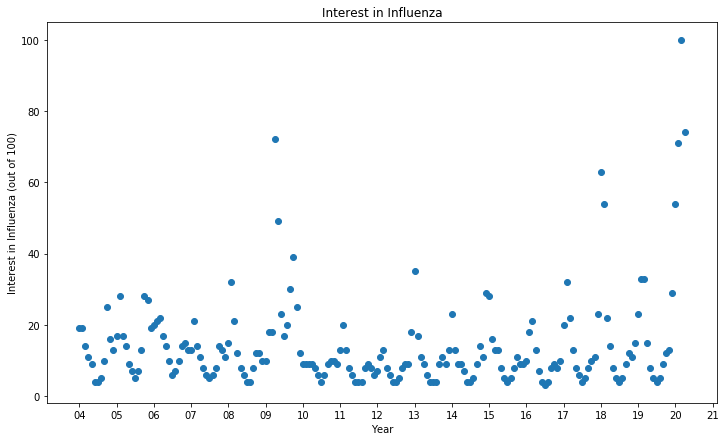

In [9]:
#Solution:

flu_interest = pd.read_csv('influenza_interest.csv')
flu_interest['Year'] = flu_interest['Month'].apply(lambda x: x[:4])
flu_interest['Month'] = flu_interest['Month'].apply(lambda x: x[5:])
df_to_print = flu_interest.copy()
df_to_print['time'] = pd.to_datetime({'day': 1,'month': flu_interest['Month'],'year': flu_interest['Year']})

# If students get an invalid type promotion error, try this:
interest = np.array(df_to_print['Interest'])
time = np.array(df_to_print['time'])

# Otherwise this should work:
#plt.scatter(df_to_print['time'], df_to_print['Interest'])

fig, ax = plt.subplots(figsize=(12, 7))
plt.scatter(time,interest)
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.set_xlabel("Year")
ax.set_ylabel("Interest in Influenza (out of 100)")
ax.set_title("Interest in Influenza")
plt.show()

**Part B:** This data (and the sea-level data from Homework 4) are both **time series**, where the independent variable is *time* and the dependent quantity is interest in influenza (or sea level in the case of HW 4). One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in influenza, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

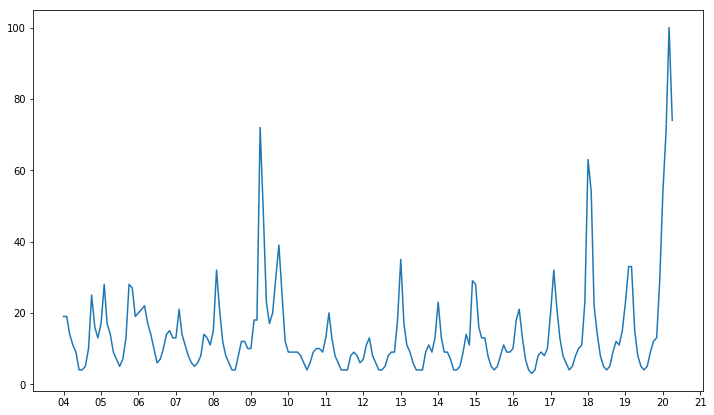

In [10]:
# Solution

fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df_to_print['time'], df_to_print['Interest'])
# Define the date format
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in influenza? During which months is interest in influenza highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in influenza for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in influenza during the fall and winter months?

In [11]:
# Solution:

ds_months = flu_interest.drop(columns=['Year'])
ds_months.groupby(['Month']).mean()

,Interest
Month,
01,22.294118
02,25.470588
03,21.882353
04,18.941176
05,10.562500
06,6.437500
07,5.000000
08,6.062500
09,10.250000


Influenza is a seasonal disease, people normally get sick from the flu in the fall and winter.

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Write a function (you'll want to use this code again later) that takes in the monthyl DataFrame, and returns a new DataFrame that consists only of two columns:

* `year`, and
* `interest`, the mean interest in data science from all of the months in that year.

Then call this function to convert the monthly data into yearly averages. Print the entire resulting datframe. 

**NOTE:** We have one year with incomplete data in our dataframe. Since 2020 isn't complete yet, we only have 3 months of data for this year. Here, we should compute the average of the three months we have. We'd recommend using a pandas [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the year column to compute averages, but how you do this is up to you. If you do use a group by, you may find the .reset_index dataframe function useful to clean up the output. Don't hardcode the years, or do anything that relies on a year being twelve months. It will make your life harder later in this problem.

In [12]:
# Solution:

def convert_to_yearly_averages(data):
    data_years = data.drop(columns=['Month'])
    data_years = data_years.groupby(['Year']).mean()
    data_years = data_years.reset_index()
    return data_years

flu_years = convert_to_yearly_averages(flu_interest)
flu_years.head(20)

,Year,Interest
0,2004,12.416667
1,2005,15.916667
2,2006,14.083333
3,2007,10.833333
4,2008,12.000000
5,2009,27.750000
6,2010,8.166667
7,2011,8.583333
8,2012,8.500000
9,2013,11.000000


**Part E:** Write a function to fit a a simple linear regression model with `year` as the feature and `interest` as the response (mean annual interest in influenza). You'll need to use this function later. This function should take in a dataframe and return a fitted model. Use the "statsmodels" package (imported below as "sm") to generate the model using their convenient [Ordinary Least Squares model](https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html). Here, you'll want to add a constant term to the feature, so that the statsmodel package can fit the regression model with a non-zero Y intercept. There's a helpful function in the statsmodels package to add a constant term, or you can write code to add the constant yourself, if you wish.

Call the function you wrote to get the regression model of our yearly average interest, then print the parameters of the regression line in the form $Y = \alpha + \beta x$. 

Then make a scatter plot of the mean annual interest in influenza as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

In [13]:
#STARTER CODE DO NOT CHANGE
import statsmodels.api as sm

Y = -2377.91584967328 + 1.1901552287582078(x)


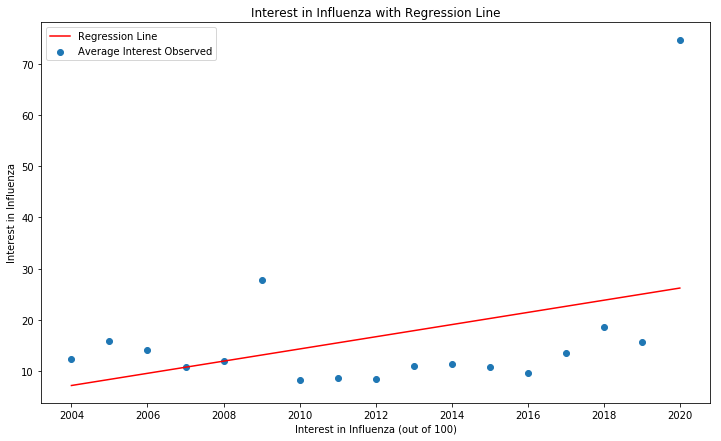

In [14]:
def fit_interest_model(data): 
    
    year_with_constant = sm.add_constant(data['Year'].astype(int))

    return sm.OLS(data['Interest'], year_with_constant).fit()


model = fit_interest_model(flu_years)

print("Y = {} + {}(x)".format(model.params[0], model.params[1]))

fig, ax = plt.subplots(figsize=(12, 7))

x_vals = range(2004, 2021, 1)
Y_vals_for_plt = model.predict(sm.add_constant(flu_years['Year'].astype(int)))


plt.scatter(x_vals, flu_years['Interest'], label="Average Interest Observed")
plt.plot(x_vals, Y_vals_for_plt, label="Regression Line", color="red")
plt.xlabel("Interest in Influenza (out of 100)")
plt.ylabel("Interest in Influenza")
plt.title("Interest in Influenza with Regression Line")
plt.legend()

plt.show()

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in influenza is positive or negative. Fully justify your responses.

**Solution:**

Beta is how fast the model predicts the interest in influenza is increasing per year. It is positive.

**Part G**: What interest in influenza does your simple linear regression model predict in the year 2050? What about in 2150? How about 1900? Feel free to use the statsmodels .predict() method here. What are potential drawbacks to this model for interest in influenza (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

In [15]:
# Solution:

model.predict([[1, 2050], [1, 2150], [1, 1900]])

array([  61.90236928,  180.91789216, -116.62091503])

This model has some problems... We would predict values above 100 for years far in the future, and negative values for years far in the past. It also doesn't really model the data that well. 

**Part H:** Write a function that computes an 90% confidence interval for the slope parameter, $\beta$. You'll need to use this function again later. This function should take in the dataframe of yearly data and a statsmodel linear regression model, and print both the 90% confidence interval for beta and the value of $\hat{\beta}$. You should be performing all calculations yourself in Python. 

**RULES: There is a statsmodels function that computes the confidence interval. Do not use it, write python code yourself to calculate the CI. You may use the statsmodels confidence interval function to check your work if your like. You also may use the statsmodel .predict() method to get predicted values, and the .params attribute to get the slope parameter. Write your own code to calculate the sum of square errors. You may use numpy functions (min, max, mean, var, etc...) and stats functions (ppf/cdf/etc...) where appropriate.**

Call the function to calculate the 90% CI for beta with this model.

In [16]:
# Solution:

def calculate_CI_slope(data, model):
    beta_hat = model.params[1]
    
    start_year = data['Year'].astype(int).min()
    end_year = data['Year'].astype(int).max()
    
    actual_values = np.array(data['Interest'])
    predicted_values = np.array([model.predict([1, x])[0] for x in range(start_year, end_year + 1)])


    sum_square_errors = np.sum((actual_values - predicted_values)**2)

    var_hat = sum_square_errors/(len(actual_values) - 2)

    original_total_variance = np.var(actual_values) * len(actual_values)

    t_stat = stats.t.ppf(0.95, len(actual_values) - 2)

    low_CI = beta_hat - t_stat * np.sqrt(var_hat/original_total_variance)

    high_CI = beta_hat + t_stat * np.sqrt(var_hat/original_total_variance)

    print("low: " + str(low_CI) + " high: " + str(high_CI) + " beta_hat: " + str(beta_hat))
    
calculate_CI_slope(flu_years, model)

low: 0.7720226316605368 high: 1.6082878258558788 beta_hat: 1.1901552287582078


**Part I:** What proportion of the variation in mean annual interest in influenza is explained by your linear regression model? Note: It's fine to use the model .summary method here. You do not need to calculate this by hand.

In [17]:
# Solution:

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Interest   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     2.578
Date:                Mon, 06 Apr 2020   Prob (F-statistic):              0.129
Time:                        12:01:26   Log-Likelihood:                -69.065
No. Observations:                  17   AIC:                             142.1
Df Residuals:                      15   BIC:                             143.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2377.9158   1491.493     -1.594      0.1

/Users/rachelcox/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


R-squared is 0.147 so 14.7%. 

**Part J:** Ouch, so that model doesn't really explain very much of the variance in the data! Maybe we have some outliers in our data. Use your original monthly dataframe and drop any rows that have an interest value greater than or equal to the 97th percentile of our data. Print the number of rows remaining.

In [18]:
# Solution:

percentile = np.percentile(flu_interest['Interest'], 97)
flu_interest_no_outliers = flu_interest.loc[flu_interest['Interest'] < percentile]
print(len(flu_interest_no_outliers))

189


**Part K:** In this problem, you'll use the functions you wrote in parts **D**, **E**, and **H** to process your new outlier free data, then fit a regression model and calculate the confidence interval on the slope parameter of the new model. First, use your function from part **D** to get the yearly averages. Second, use the function from part **E** to fit a linear regression model to the yearly averages. Finally, use the function you wrote in **H** to print the 90% confidence interval of the slope and the estimated slope.

In [19]:
data = convert_to_yearly_averages(flu_interest_no_outliers)
model = fit_interest_model(data)
calculate_CI_slope(data, model)

low: -0.6099328551497061 high: 0.3159043346505736 beta_hat: -0.14701426024956626


**Part L:** Our estimate for beta, the slope parameter in part **K** should have come out to be slightly negative, and also should have had a confidence interval that included zero (check your work if it didn't). What does this tell us about our data? Does it seem like interest in Influenza is increasing or decreasing over time? Or is the interest in Influenza more affected by yearly trends and high peaks in intrest during especially bad years for flu (or flu like diseases)?

**Solution:**

Doesn't really look like interest in Influenza is increasing or decreasing over time. The variance in the data is probably more explained by the fact that people get the flu in the winter, and that more people are likely to google Influenza when a paticularly virulent strain of the flu or another flu like diesease is spreading. 